In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split  
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import KFold
%matplotlib inline
import itertools

In [2]:
nursery = pd.read_csv("nursery_numerical.csv", sep=',')
nursery.head()

,Parents,Has_nurs,Form,Children,Housing,Finance,Social,Health,Class
0,1,1,1,1,1,1,1,1,recommend
1,1,1,1,1,1,1,1,2,not_recom
2,1,1,1,1,1,1,2,3,priority
3,1,1,1,1,1,1,3,1,priority
4,1,1,1,1,1,1,3,3,priority


In [3]:
poker = pd.read_csv("poker.csv", sep=',')
poker2 = poker.head(200000)
poker2.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Class
0,3,12,3,2,3,11,4,5,2,5,1
1,1,9,4,6,1,4,3,2,3,9,1
2,1,4,3,13,2,13,2,1,3,6,1
3,3,10,2,7,1,2,2,11,4,9,0
4,1,3,4,5,3,4,1,12,4,6,0


In [5]:
market = pd.read_csv("marketing_numerical.csv")
market.head()

,Sex,MaritalStatus,Age,Education,Occupation,YearsInSf,DualIncome,HouseholdMembers,Under18,HouseholdStatus,TypeOfHome,EthnicClass,Language,Class
0,1,1.0,5,5.0,5.0,5.0,3,5.0,2,1.0,1.0,7.0,1.0,9
1,2,1.0,3,5.0,1.0,5.0,2,3.0,1,2.0,3.0,7.0,1.0,9
2,2,5.0,1,2.0,6.0,5.0,1,4.0,2,3.0,1.0,7.0,1.0,1
3,2,5.0,1,2.0,6.0,3.0,1,4.0,2,3.0,1.0,7.0,1.0,1
4,1,1.0,6,4.0,8.0,5.0,3,2.0,0,1.0,1.0,7.0,1.0,8


In [6]:
print(nursery.shape)
print(nursery.groupby('Class').size())

(12960, 9)
Class
 not_recom     4319
 priority      4266
 recommend        2
 spec_prior    4045
 very_recom     328
dtype: int64


In [7]:
print(poker2.shape)
print(poker2.groupby('Class').size())

(200000, 11)
Class
0    100293
1     84481
2      9607
3      4140
4       762
5       382
6       290
7        41
8         3
9         1
dtype: int64


In [9]:
print(market.shape)
print(market.groupby("Class").size())

(6876, 14)
Class
1    1255
2     529
3     505
4     618
5     527
6     846
7     784
8    1069
9     743
dtype: int64


In [10]:
data_nursery = nursery.iloc[:,0:8]
labels_nursery = nursery.iloc[:,8]

In [11]:
data_poker = poker2.iloc[:,0:10]
labelsPokernum = poker2.iloc[:,10]
labels_poker = pd.Series((str(i) for i in labelsPokernum))

In [13]:
data_market = market.iloc[:,0:13]
labelsMarketnum = market.iloc[:,13]
labels_market = pd.Series((str(i) for i in labelsMarketnum))

In [14]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [15]:
kf = KFold(n_splits=2, shuffle=True)

## SVM for Nursery Dataset

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

    priority       1.00      1.00      1.00      2138
   not_recom       0.94      0.96      0.95      2124
  spec_prior       0.96      0.97      0.96      2053
  very_recom       0.96      0.62      0.75       165

   micro avg       0.97      0.97      0.97      6480
   macro avg       0.97      0.89      0.92      6480
weighted avg       0.97      0.97      0.97      6480

accuracy:  0.966820987654321


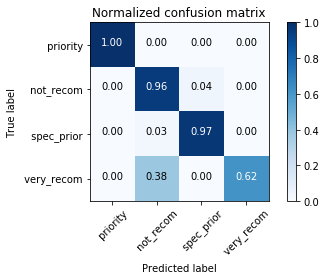

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

  very_recom       1.00      1.00      1.00      2181
   not_recom       0.96      0.96      0.96      2142
   recommend       0.00      0.00      0.00         2
    priority       0.96      0.98      0.97      1992
  spec_prior       0.95      0.73      0.83       163

   micro avg       0.97      0.97      0.97      6480
   macro avg       0.78      0.73      0.75      6480
weighted avg       0.97      0.97      0.97      6480

accuracy:  0.9745370370370371


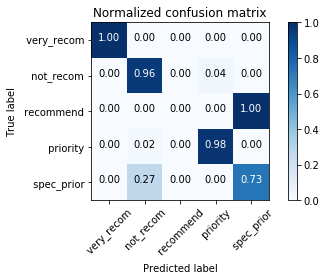

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

    priority       1.00      1.00      1.00      2191
   not_recom       0.94      0.97      0.95      2111
  spec_prior       0.97      0.97      0.97      2002
  very_recom       0.97      0.57      0.72       176

   micro avg       0.97      0.97      0.97      6480
   macro avg       0.97      0.88      0.91      6480
weighted avg       0.97      0.97      0.97      6480

accuracy:  0.9699074074074074


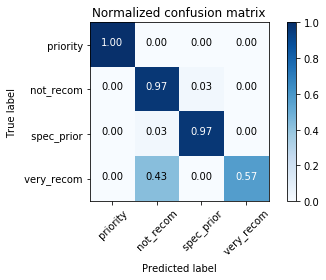

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

  very_recom       1.00      1.00      1.00      2128
   not_recom       0.96      0.95      0.95      2155
   recommend       0.00      0.00      0.00         2
    priority       0.95      0.97      0.96      2043
  spec_prior       0.93      0.75      0.83       152

   micro avg       0.97      0.97      0.97      6480
   macro avg       0.77      0.73      0.75      6480
weighted avg       0.97      0.97      0.97      6480

accuracy:  0.9682098765432099


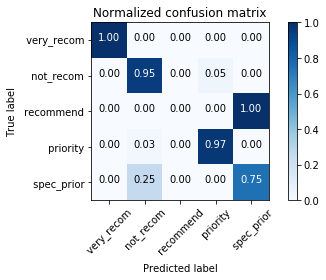

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

    priority       1.00      1.00      1.00      2182
   not_recom       0.95      0.97      0.96      2128
  spec_prior       0.97      0.98      0.98      1996
  very_recom       0.97      0.64      0.78       174

   micro avg       0.98      0.98      0.98      6480
   macro avg       0.97      0.90      0.93      6480
weighted avg       0.98      0.98      0.97      6480

accuracy:  0.9751543209876543


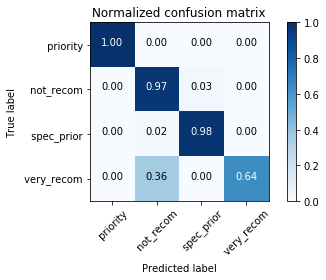

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

  very_recom       1.00      1.00      1.00      2137
   not_recom       0.96      0.96      0.96      2138
   recommend       0.00      0.00      0.00         2
    priority       0.96      0.98      0.97      2049
  spec_prior       0.92      0.69      0.79       154

   micro avg       0.97      0.97      0.97      6480
   macro avg       0.77      0.73      0.74      6480
weighted avg       0.97      0.97      0.97      6480

accuracy:  0.9723765432098765


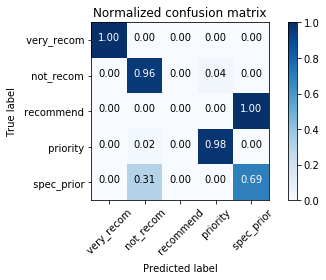

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

  very_recom       1.00      1.00      1.00      2207
   not_recom       0.95      0.95      0.95      2079
   recommend       0.00      0.00      0.00         1
    priority       0.96      0.97      0.96      2036
  spec_prior       0.93      0.74      0.82       157

   micro avg       0.97      0.97      0.97      6480
   macro avg       0.77      0.73      0.75      6480
weighted avg       0.97      0.97      0.97      6480

accuracy:  0.9694444444444444


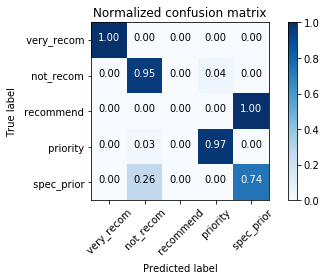

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

  very_recom       1.00      1.00      1.00      2112
   not_recom       0.95      0.96      0.96      2187
   recommend       0.00      0.00      0.00         1
    priority       0.96      0.97      0.97      2009
  spec_prior       0.97      0.63      0.76       171

   micro avg       0.97      0.97      0.97      6480
   macro avg       0.78      0.71      0.74      6480
weighted avg       0.97      0.97      0.97      6480

accuracy:  0.9699074074074074


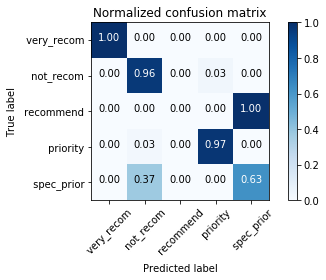

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

  very_recom       1.00      1.00      1.00      2140
   not_recom       0.96      0.96      0.96      2126
   recommend       0.00      0.00      0.00         1
    priority       0.96      0.98      0.97      2047
  spec_prior       0.94      0.72      0.82       166

   micro avg       0.97      0.97      0.97      6480
   macro avg       0.77      0.73      0.75      6480
weighted avg       0.97      0.97      0.97      6480

accuracy:  0.971141975308642


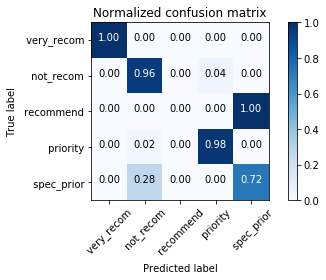

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

  very_recom       1.00      1.00      1.00      2179
   not_recom       0.95      0.97      0.96      2140
   recommend       0.00      0.00      0.00         1
    priority       0.97      0.98      0.97      1998
  spec_prior       0.95      0.62      0.75       162

   micro avg       0.97      0.97      0.97      6480
   macro avg       0.77      0.71      0.74      6480
weighted avg       0.97      0.97      0.97      6480

accuracy:  0.9717592592592592


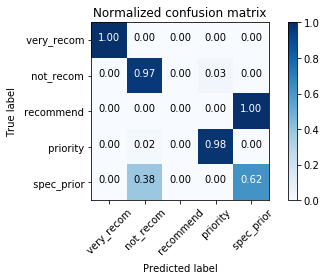

In [16]:
for i in range(5):
    for train_index, test_index in kf.split(nursery):
        X_train, X_test = data_nursery.iloc[train_index], data_nursery.iloc[test_index]
        y_train, y_test = labels_nursery[train_index], labels_nursery[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        svm = SVC()
        svm.fit(X_train, y_train)
        predicted = svm.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

## SVM for Poker Dataset

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           8       0.65      0.75      0.70     49926
           2       0.56      0.56      0.56     42420
           0       0.39      0.01      0.01      4839
           5       0.60      0.00      0.00      2087
           4       0.00      0.00      0.00       365
           7       0.00      0.00      0.00       182
           1       0.00      0.00      0.00       158
           6       0.00      0.00      0.00        20
           3       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1

   micro avg       0.61      0.61      0.61    100000
   macro avg       0.22      0.13      0.13    100000
weighted avg       0.59      0.61      0.59    100000

accuracy:  0.61242


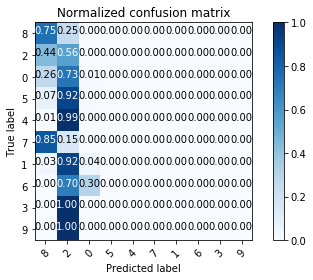

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           8       0.65      0.76      0.70     50367
           2       0.56      0.55      0.56     42061
           0       0.47      0.00      0.01      4768
           5       0.50      0.00      0.00      2053
           4       0.00      0.00      0.00       397
           7       0.00      0.00      0.00       200
           1       0.00      0.00      0.00       132
           6       0.00      0.00      0.00        21
           3       0.00      0.00      0.00         1

   micro avg       0.61      0.61      0.61    100000
   macro avg       0.24      0.15      0.14    100000
weighted avg       0.60      0.61      0.59    100000

accuracy:  0.61402


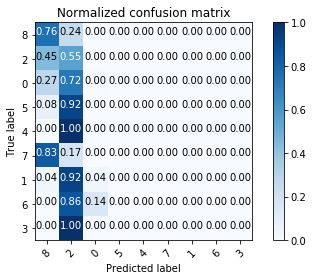

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           8       0.65      0.76      0.70     50120
           2       0.56      0.55      0.56     42215
           0       0.42      0.00      0.01      4804
           5       0.38      0.00      0.00      2128
           4       0.00      0.00      0.00       358
           7       0.00      0.00      0.00       201
           1       0.00      0.00      0.00       147
           6       0.00      0.00      0.00        25
           3       0.00      0.00      0.00         2

   micro avg       0.61      0.61      0.61    100000
   macro avg       0.22      0.15      0.14    100000
weighted avg       0.59      0.61      0.59    100000

accuracy:  0.6125


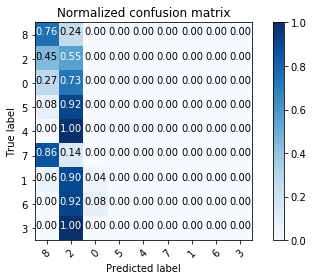

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           8       0.65      0.75      0.70     50173
           2       0.56      0.56      0.56     42266
           0       0.37      0.00      0.01      4803
           5       0.00      0.00      0.00      2012
           4       0.00      0.00      0.00       404
           7       0.00      0.00      0.00       181
           1       0.00      0.00      0.00       143
           6       0.00      0.00      0.00        16
           3       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

   micro avg       0.61      0.61      0.61    100000
   macro avg       0.16      0.13      0.13    100000
weighted avg       0.58      0.61      0.59    100000

accuracy:  0.6141


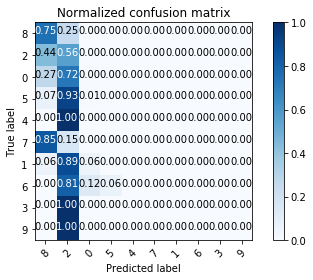

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           2       0.65      0.76      0.70     50071
           0       0.56      0.56      0.56     42227
           5       0.38      0.00      0.01      4880
           4       0.33      0.00      0.00      2080
           7       0.00      0.00      0.00       390
           1       0.00      0.00      0.00       177
           6       0.00      0.00      0.00       156
           3       0.00      0.00      0.00        19

   micro avg       0.61      0.61      0.61    100000
   macro avg       0.24      0.16      0.16    100000
weighted avg       0.59      0.61      0.59    100000

accuracy:  0.6132


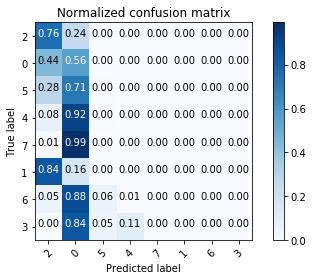

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           8       0.65      0.75      0.70     50222
           2       0.56      0.55      0.56     42254
           0       0.41      0.01      0.01      4727
           5       0.33      0.00      0.00      2060
           4       0.00      0.00      0.00       372
           7       0.00      0.00      0.00       205
           1       0.00      0.00      0.00       134
           6       0.00      0.00      0.00        22
           3       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         1

   micro avg       0.61      0.61      0.61    100000
   macro avg       0.20      0.13      0.13    100000
weighted avg       0.59      0.61      0.59    100000

accuracy:  0.61299


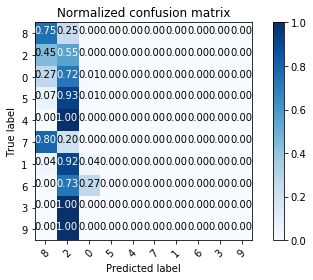

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           2       0.65      0.76      0.70     50087
           0       0.57      0.56      0.56     42341
           5       0.32      0.00      0.01      4771
           4       0.11      0.00      0.00      2084
           7       0.00      0.00      0.00       372
           1       0.00      0.00      0.00       179
           6       0.00      0.00      0.00       139
           3       0.00      0.00      0.00        26
           9       0.00      0.00      0.00         1

   micro avg       0.61      0.61      0.61    100000
   macro avg       0.18      0.15      0.14    100000
weighted avg       0.58      0.61      0.59    100000

accuracy:  0.61432


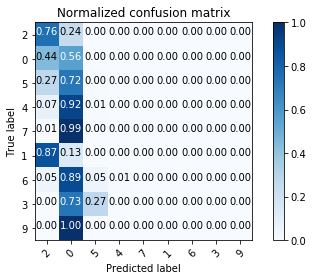

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           8       0.65      0.75      0.70     50206
           2       0.56      0.56      0.56     42140
           0       0.44      0.00      0.01      4836
           5       0.14      0.00      0.00      2056
           4       0.00      0.00      0.00       390
           7       0.00      0.00      0.00       203
           1       0.00      0.00      0.00       151
           6       0.00      0.00      0.00        15
           3       0.00      0.00      0.00         3

   micro avg       0.61      0.61      0.61    100000
   macro avg       0.20      0.15      0.14    100000
weighted avg       0.59      0.61      0.59    100000

accuracy:  0.61456


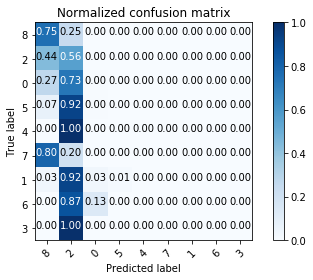

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           8       0.65      0.76      0.70     50087
           2       0.57      0.56      0.56     42329
           0       0.43      0.01      0.01      4771
           5       0.67      0.00      0.00      2059
           4       0.00      0.00      0.00       387
           7       0.00      0.00      0.00       203
           1       0.00      0.00      0.00       141
           6       0.00      0.00      0.00        20
           3       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1

   micro avg       0.61      0.61      0.61    100000
   macro avg       0.23      0.13      0.13    100000
weighted avg       0.60      0.61      0.59    100000

accuracy:  0.61491


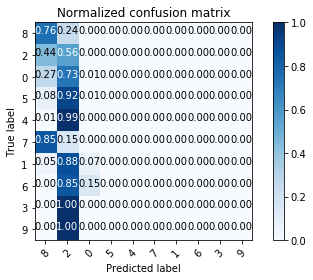

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           8       0.65      0.76      0.70     50206
           2       0.56      0.55      0.56     42152
           0       0.48      0.00      0.01      4836
           5       0.00      0.00      0.00      2081
           4       0.00      0.00      0.00       375
           7       0.00      0.00      0.00       179
           1       0.00      0.00      0.00       149
           6       0.00      0.00      0.00        21
           3       0.00      0.00      0.00         1

   micro avg       0.61      0.61      0.61    100000
   macro avg       0.19      0.15      0.14    100000
weighted avg       0.59      0.61      0.59    100000

accuracy:  0.61293


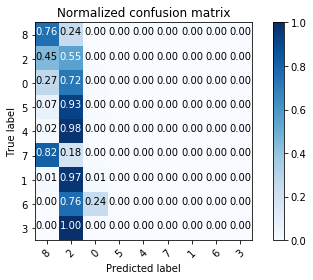

In [19]:
for i in range(5):
    for train_index, test_index in kf.split(poker2):
        X_train, X_test = data_poker.iloc[train_index], data_poker.iloc[test_index]
        y_train, y_test = labels_poker[train_index], labels_poker[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        svm = SVC()
        svm.fit(X_train, y_train)
        predicted = svm.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

## SVM for Market

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           8       0.52      0.80      0.63       642
           2       0.20      0.13      0.16       253
           3       0.21      0.11      0.14       249
           5       0.21      0.14      0.17       318
           4       0.14      0.13      0.14       249
           1       0.23      0.23      0.23       433
           6       0.19      0.08      0.11       408
           7       0.31      0.50      0.38       521
           9       0.41      0.31      0.35       365

   micro avg       0.34      0.34      0.34      3438
   macro avg       0.27      0.27      0.26      3438
weighted avg       0.30      0.34      0.30      3438

accuracy:  0.337696335078534


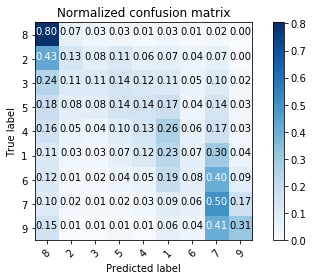

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           8       0.50      0.82      0.62       613
           2       0.14      0.11      0.12       276
           3       0.20      0.12      0.15       256
           5       0.20      0.17      0.19       300
           4       0.20      0.04      0.06       278
           1       0.21      0.24      0.22       413
           6       0.19      0.17      0.18       376
           7       0.33      0.43      0.37       548
           9       0.51      0.29      0.37       378

   micro avg       0.33      0.33      0.33      3438
   macro avg       0.28      0.27      0.25      3438
weighted avg       0.30      0.33      0.30      3438

accuracy:  0.3298429319371728


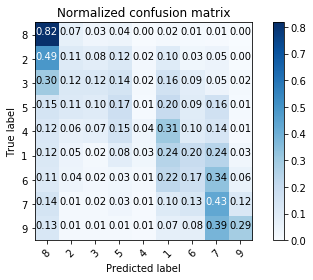

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           8       0.56      0.77      0.65       669
           2       0.20      0.12      0.15       255
           3       0.18      0.12      0.14       240
           5       0.19      0.19      0.19       289
           4       0.14      0.07      0.09       264
           1       0.21      0.24      0.23       431
           6       0.20      0.14      0.17       380
           7       0.30      0.48      0.37       523
           9       0.53      0.27      0.35       387

   micro avg       0.34      0.34      0.34      3438
   macro avg       0.28      0.27      0.26      3438
weighted avg       0.32      0.34      0.31      3438

accuracy:  0.3368237347294939


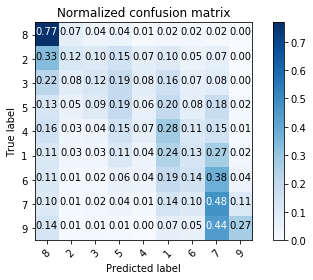

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           8       0.48      0.88      0.62       586
           2       0.15      0.08      0.11       274
           5       0.28      0.11      0.16       265
           4       0.23      0.16      0.19       329
           7       0.15      0.11      0.12       263
           1       0.22      0.28      0.25       415
           6       0.25      0.08      0.12       404
           3       0.32      0.45      0.37       546
           9       0.42      0.31      0.36       356

   micro avg       0.34      0.34      0.34      3438
   macro avg       0.28      0.27      0.26      3438
weighted avg       0.30      0.34      0.30      3438

accuracy:  0.3356602675974404


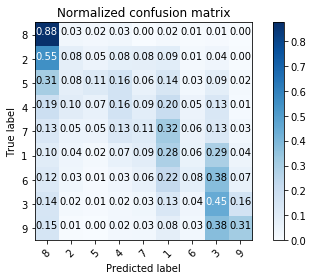

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           8       0.52      0.83      0.64       638
           2       0.23      0.08      0.12       268
           3       0.22      0.16      0.18       251
           5       0.17      0.17      0.17       300
           4       0.21      0.07      0.11       264
           1       0.23      0.23      0.23       435
           6       0.20      0.15      0.17       379
           7       0.31      0.44      0.36       529
           9       0.46      0.34      0.39       374

   micro avg       0.34      0.34      0.34      3438
   macro avg       0.28      0.27      0.26      3438
weighted avg       0.31      0.34      0.31      3438

accuracy:  0.34176847004072136


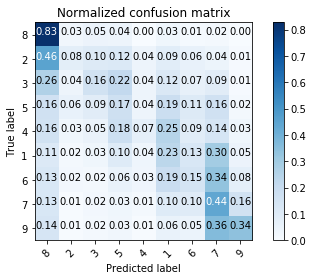

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           8       0.50      0.84      0.63       617
           2       0.24      0.13      0.17       261
           5       0.21      0.14      0.17       254
           4       0.15      0.11      0.13       318
           7       0.17      0.03      0.05       263
           1       0.22      0.34      0.26       411
           6       0.21      0.09      0.13       405
           3       0.32      0.47      0.38       540
           9       0.51      0.30      0.38       369

   micro avg       0.34      0.34      0.34      3438
   macro avg       0.28      0.27      0.26      3438
weighted avg       0.31      0.34      0.30      3438

accuracy:  0.34060500290866785


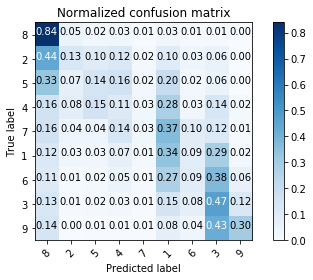

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           8       0.51      0.80      0.62       646
           2       0.19      0.19      0.19       248
           3       0.32      0.09      0.14       274
           5       0.24      0.23      0.23       311
           4       0.14      0.08      0.10       248
           1       0.24      0.23      0.23       433
           6       0.20      0.16      0.18       374
           7       0.33      0.37      0.35       552
           9       0.38      0.38      0.38       352

   micro avg       0.34      0.34      0.34      3438
   macro avg       0.28      0.28      0.27      3438
weighted avg       0.31      0.34      0.31      3438

accuracy:  0.34060500290866785


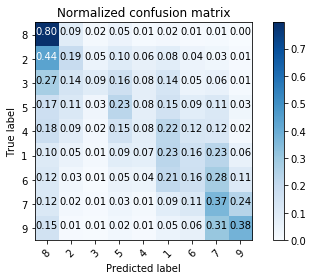

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           8       0.50      0.83      0.62       609
           2       0.22      0.09      0.13       281
           5       0.20      0.16      0.18       231
           4       0.26      0.21      0.23       307
           7       0.18      0.02      0.04       279
           1       0.20      0.30      0.24       413
           6       0.18      0.06      0.09       410
           3       0.30      0.54      0.39       517
           9       0.56      0.25      0.35       391

   micro avg       0.34      0.34      0.34      3438
   macro avg       0.29      0.27      0.25      3438
weighted avg       0.31      0.34      0.29      3438

accuracy:  0.33856893542757416


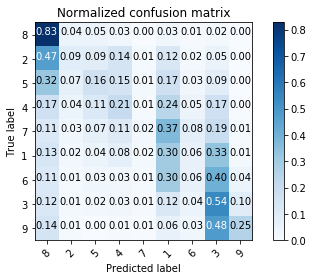

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           8       0.50      0.80      0.62       584
           2       0.22      0.16      0.19       258
           3       0.20      0.13      0.16       250
           5       0.22      0.17      0.19       324
           4       0.20      0.10      0.13       276
           1       0.21      0.26      0.23       427
           6       0.24      0.10      0.14       413
           7       0.31      0.46      0.37       544
           9       0.43      0.33      0.38       362

   micro avg       0.33      0.33      0.33      3438
   macro avg       0.28      0.28      0.27      3438
weighted avg       0.30      0.33      0.30      3438

accuracy:  0.3333333333333333


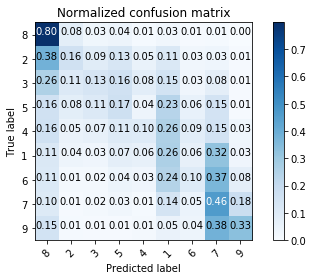

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           8       0.51      0.84      0.64       671
           2       0.16      0.07      0.10       271
           3       0.23      0.12      0.16       255
           5       0.17      0.19      0.18       294
           4       0.15      0.02      0.04       251
           1       0.21      0.23      0.22       419
           6       0.20      0.15      0.17       371
           7       0.31      0.47      0.37       525
           9       0.51      0.25      0.34       381

   micro avg       0.34      0.34      0.34      3438
   macro avg       0.27      0.26      0.25      3438
weighted avg       0.31      0.34      0.30      3438

accuracy:  0.3403141361256545


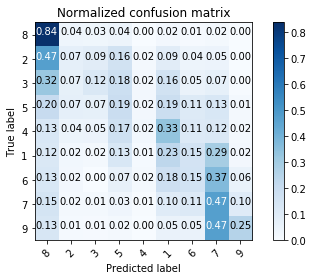

In [18]:
for i in range(5):
    for train_index, test_index in kf.split(market):
        X_train, X_test = data_market.iloc[train_index], data_market.iloc[test_index]
        y_train, y_test = labels_market[train_index], labels_market[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        svm = SVC()
        svm.fit(X_train, y_train)
        predicted = svm.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

In [ ]:
# import csv
# printinacc=[]
# with open('MarketingAcc.csv', "w") as output:
#     writer = csv.writer(output, lineterminator='\n')
#     for val in printinacc:
#         writer.writerow(val)  